In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bsfile1/BS Velocity.csv
/kaggle/input/tafile2/Throwing Acceleration.csv


In [2]:
df = pd.read_csv('../input/bsfile1/BS Velocity.csv')
print(df)

    time (s)  velocity (km/h)
0        0.0             80.0
1        0.5             85.0
2        1.0             90.0
3        1.5            105.0
4        2.0            120.0
5        2.5            115.0
6        3.0            110.0
7        3.5            105.0
8        4.0            100.0
9        4.5            115.0
10       5.0            130.0
11       5.5            122.5
12       6.0            115.0
13       6.5            110.0
14       7.0            105.0
15       7.5            110.0
16       8.0            115.0
17       8.5            125.0
18       9.0            140.0
19       9.5            130.0
20      10.0            120.0
21      10.5            115.0
22      11.0            110.0
23      11.5            105.0
24      12.0            145.0
25      12.5            135.0
26      13.0            125.0
27      13.5            120.0
28      14.0            115.0
29      14.5            110.0
30      15.0            150.0
31      15.5            140.0
32      16

In [3]:
import matplotlib.pyplot as plt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time (s)         41 non-null     float64
 1   velocity (km/h)  41 non-null     float64
dtypes: float64(2)
memory usage: 784.0 bytes


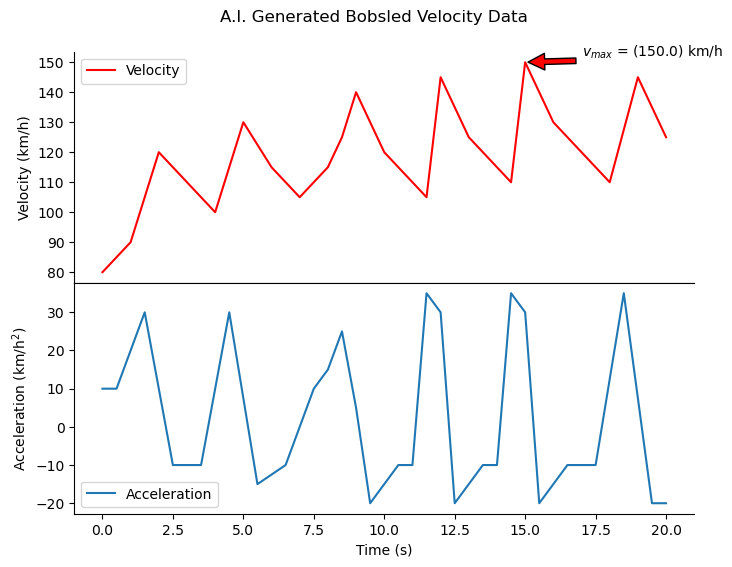

In [7]:
x = df['time (s)']
y = df['velocity (km/h)']

ymax = max(y)
xmax = x[y.argmax()]
acc = np.gradient(y, x)

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8,6))
fig.suptitle("A.I. Generated Bobsled Velocity Data", y=0.95) 
fig.subplots_adjust(hspace=0)

axs[0].annotate('$v_{{max}}$ = ({}) km/h'.format(round(ymax, 2)), 
            xy=(xmax, ymax), xytext=(xmax+2, ymax+2), 
            arrowprops=dict(facecolor='red', shrink= 0.05))

axs[0].plot(x, y, color='red', label='Velocity') # <-- add label for velocity line
axs[0].set_ylabel('Velocity (km/h)')
axs[1].plot(x, acc, label='Acceleration') # <-- add label for acceleration line
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Acceleration (km/h$^2$)')
axs[0].spines[['right', 'top']].set_visible(False)
axs[1].spines[['right']].set_visible(False)
axs[0].set(xlabel='Time (s)')
axs[0].legend(loc='upper left')
axs[1].legend(loc='lower left')

fig.savefig("AIbobsled.png", dpi=300, bbox_inches = "tight")